# Matplotlib: Format Charts

In [76]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Subplots

* [matplotlib.plyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots)
* [Examples](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/index.html)


<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._axes.Axes'>


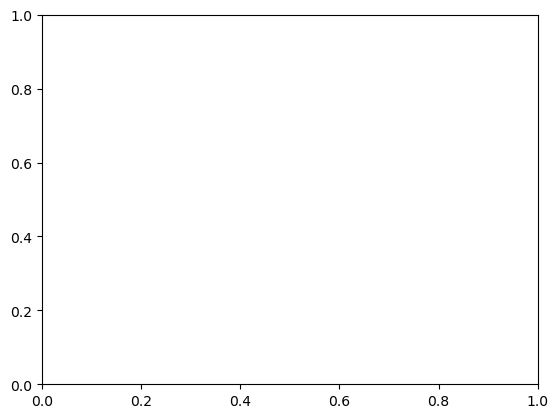

In [77]:
fig, ax = plt.subplots()

print(type(fig))
print(type(ax))

### Example 1 - adding single chart to subplots

<Axes: xlabel='job_title_short'>

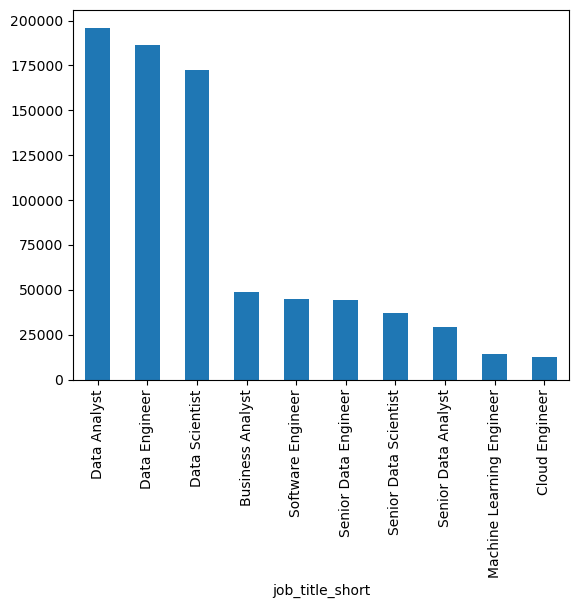

In [78]:
fig, ax = plt.subplots()

# Bar Chart Plot for the job counts per job title and add it to the subplot
df['job_title_short'].value_counts().plot(kind='bar', ax=ax)

### Example 2 - Multiple chart plots

#### Pandas Plot Method Approach

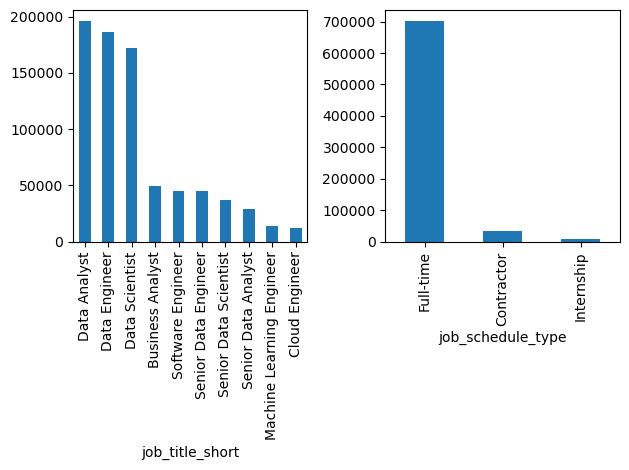

In [79]:
# Setup subplot with 1 row and 2 columns
fig, ax = plt.subplots(1, 2)

# Job Count by Job Title
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])

# Top 3 Job Counts by Job Schedule Type
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])

# Avoid overlapping of charts
fig.tight_layout()

#### Matplotlb's bar method approach

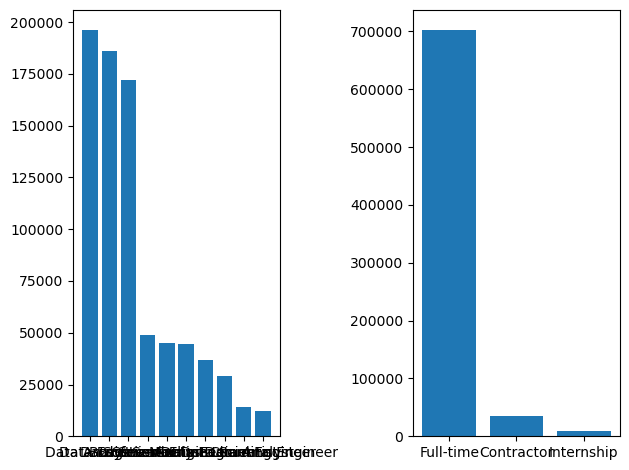

In [80]:
# Setup subplot with 1 row and 2 columns
fig, ax = plt.subplots(1, 2)

# Job Count by Job Title
ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())

# Top 3 Job Counts by Job Schedule Type
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))

# Avoid overlapping of charts
fig.tight_layout()

## Example 3 - Counts of Top Skills in Job Postings

### Get skills count by Job Title

In [81]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


### Create a list of job titles to plot

In [82]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

job_titles

['Data Scientist', 'Data Engineer', 'Data Analyst']

### Create figure and axes 

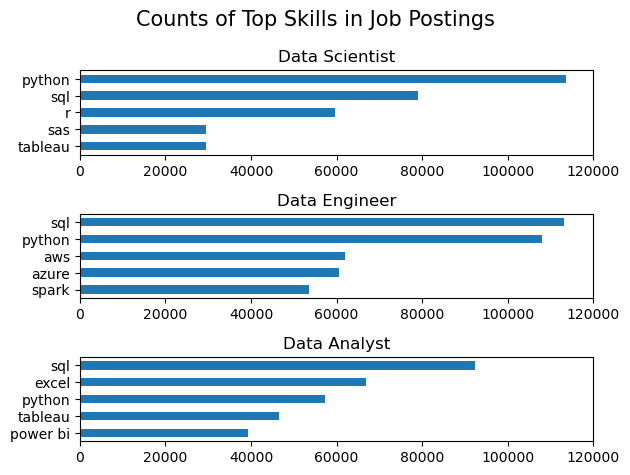

In [83]:
# Plot will contain a new row for each job title and 1 column(Multiple charts in a single figure)
num_rows = len(job_titles)
num_columns = 1

fig, ax = plt.subplots(num_rows, num_columns)

# For each job title, Loop thru the index and job tile in the job titles list and plot the job counts
for i, job_title in enumerate(job_titles):
    # Select top 5 skills counts for each job title and add them to the figure
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head()
    
    # Plot the data frame on the axis for the given index
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)

    # Put the highest count of skills on top
    ax[i].invert_yaxis()

    # Remove Y axis label
    ax[i].set_ylabel('')

    # Remove Legend
    ax[i].legend().set_visible(False)

    # Set the min and max scale so each chart is using the same scale
    ax[i].set_xlim(0, 120_000)


# Set the overall title (Super Title) of the figure
fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)

# Fix spacing on the overall figure between each axis
fig.tight_layout()


# Display figure
plt.show()

# Problems

In [84]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Subplots with Bar Charts (2.13.1) - Problem

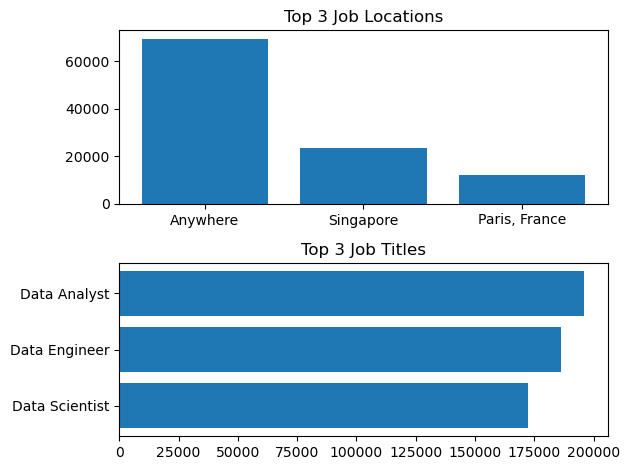

In [85]:
fig, ax = plt.subplots(2, 1)

# Top 3 job locations
job_locations = df['job_location'].value_counts().head(3)
ax[0].bar(job_locations.index, job_locations.values)
ax[0].set_title('Top 3 Job Locations')

# Top 3 job titles
job_titles = df['job_title_short'].value_counts().head(3)
ax[1].barh(job_titles.index, job_titles.values)
ax[1].set_title('Top 3 Job Titles')
ax[1].invert_yaxis()

fig.tight_layout()
plt.show()


## Subplots with Job Titles by Schedule (2.13.2) - Problem

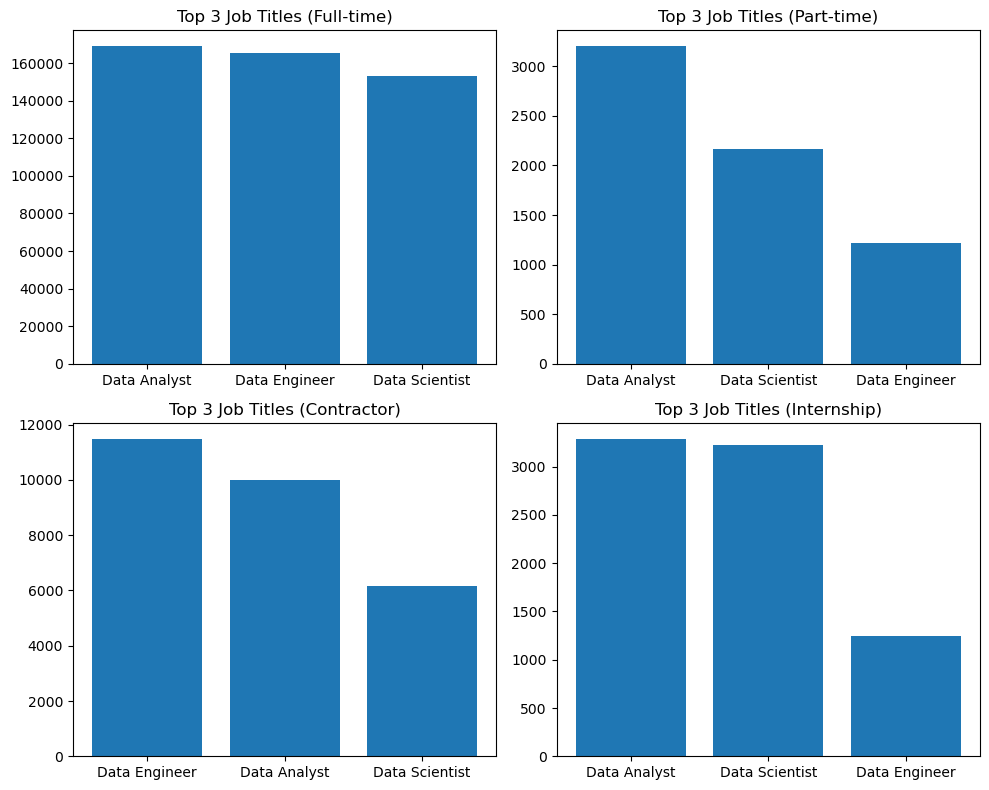

In [140]:
fig, ax = plt.subplots(2, 2, figsize=(10,8))
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']



for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule})')

fig.tight_layout()
plt.show()

## Top Skills for Job Roles Subplots (2.13.3) - Problem

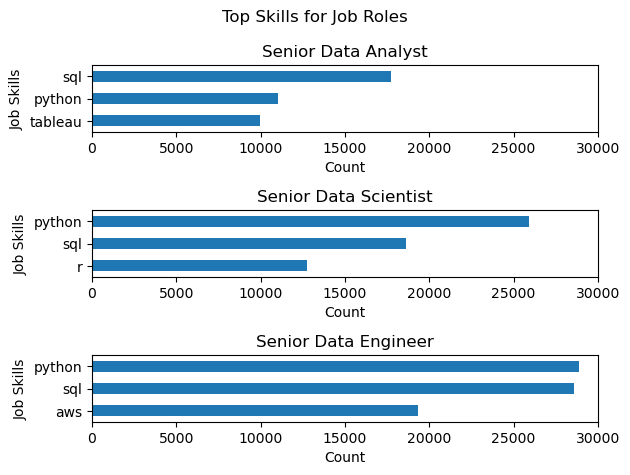

In [166]:
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)


num_rows = len(job_roles)
num_columns = 1

fig, ax = plt.subplots(num_rows, num_columns)

for i, job_role in enumerate(job_roles):
    df_job_count = df_skills_count[df_skills_count['job_title_short'] == job_role].head(3)
    df_job_count.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_role)
    ax[i].invert_yaxis()
    ax[i].set_xlabel('Count')
    ax[i].set_ylabel('Job Skills')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 30_000)


fig.suptitle('Top Skills for Job Roles')
fig.tight_layout()
plt.show()